In [1]:
from nptdms import TdmsFile
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ip
from ipywidgets import interact
import os
import glob
#from bokeh.plotting import figure, show

In [2]:
ls

2 Fibril_001_video.tdms*              TDMS-Explorer.ipynb
Clustering Video.tdms                 TDMS2Explorer.ipynb
Clustering.tdms                       TDMS2Image.ipynb
Clustering1 Video.tdms                TDMS2ImageHough.ipynb
GAN.ipynb                             TDMS_Fibrils.jl
Images/                               droplet.png
JP_Data/                              dt=0.250034.tdms*
JP_Data1/                             output.png
Manydrops 014 video.tdms              widefield_only_P_2_17_001_video.tdms
OCNN.ipynb                            widefield_only_P_2_17_012_video.tdms
Set_000_video.tdms


In [48]:

file="Set_000_video.tdms"
#file="2 Fibril_001_video.tdms"

In [49]:
tdms_file=TdmsFile.read(file)
groups=[group.name for group in tdms_file.groups()]
channels=[[ channel.name for channel in group.channels()] for group in tdms_file.groups()]


In [50]:
group=ip.Dropdown(options=groups)
init=group.index
channel=ip.Dropdown(options=channels[init][:])

In [51]:
l=ip.Output(layout={'border': '0px solid black'})
m=ip.Output(layout={'border': '0px solid black'})

In [52]:
def channel_select(channel_name):
    data=tdms_file[group.value].as_dataframe()
    l.clear_output()
    m.clear_output()
    with l:
        display(tdms_file.properties)

    with m:
        display(data[channel.value])
    
def group_select(group_name):
    #print(tdms_file.properties)

    channel.options = channels[group.options.index(group_name)][:]

In [53]:
j = ip.interactive(channel_select, channel_name=channel)
i = ip.interactive(group_select, group_name=group)

In [54]:
a=ip.HBox([i,j])
b=ip.HBox([l,m])
ip.VBox([a,b])

In [37]:
images=tdms_file.groups()[0].channels()[0].data


In [55]:
props=dict(tdms_file.properties)
dimx=int(props["dimx"])
dimy=int(props["dimy"])
frames=int(int(props["frames"]))

In [56]:
images=images.reshape((frames,dimx,dimy))

In [57]:
@interact(frame=(0,frames-2))
def show_cor(frame):
    plt.imshow(images[frame,:,:])

interactive(children=(IntSlider(value=49, description='frame', max=98), Output()), _dom_classes=('widget-inter…

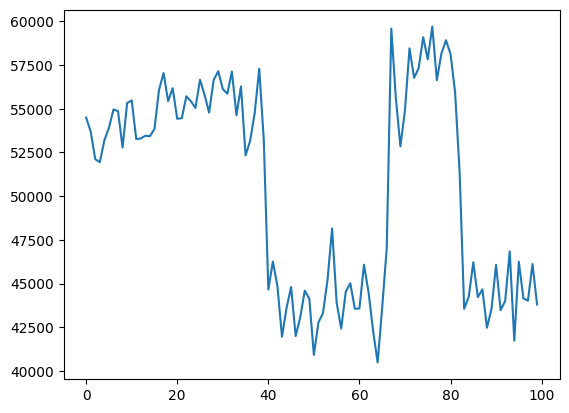

In [77]:
plt.plot(np.sum(images[:,490:510,400],axis=1))

(350.0, 450.0)

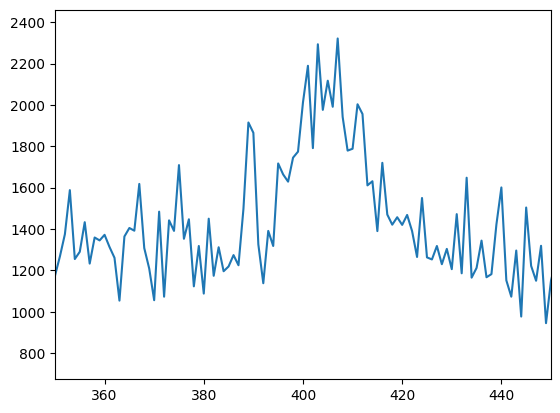

In [60]:

plt.plot(images[2,:,500])
plt.xlim(350,450)